In [1]:
# Import Libraries

import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn import metrics

In [2]:
# Load the Dataset

rwine = pd.read_csv("winequality-red.csv")

# Exploratory Data Analysis

In [3]:
# Explore rwine

rwine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
rwine.tail(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1589,6.6,0.725,0.20,7.8,0.073,29.0,79.0,0.99770,3.29,0.54,9.2,5
1590,6.3,0.550,0.15,1.8,0.077,26.0,35.0,0.99314,3.32,0.82,11.6,6
1591,5.4,0.740,0.09,1.7,0.089,16.0,26.0,0.99402,3.67,0.56,11.6,6
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
rwine.shape

(1599, 12)

In [6]:
rwine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
rwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


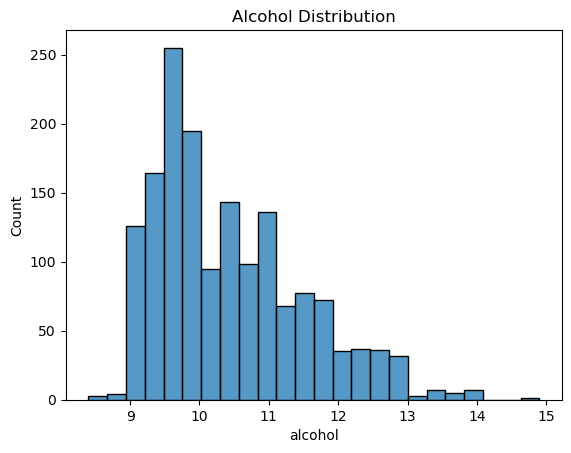

In [8]:
# Alcohol Distribution

sns.histplot(rwine.alcohol)
plt.title("Alcohol Distribution")
plt.show()

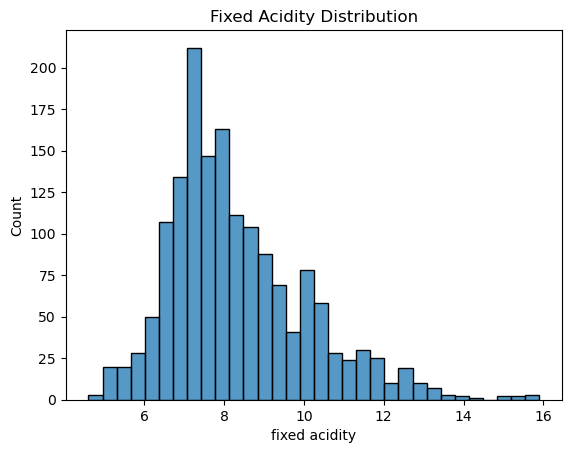

In [9]:
# Fixed Acidity Distribution

sns.histplot(rwine["fixed acidity"])
plt.title("Fixed Acidity Distribution")
plt.show()

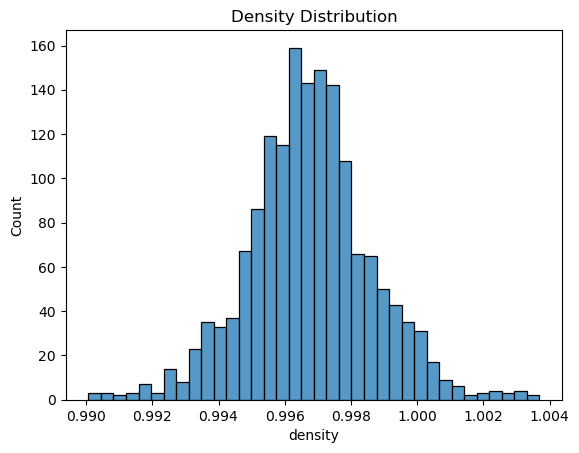

In [10]:
# Density Distribution

sns.histplot(rwine.density)
plt.title("Density Distribution")
plt.show()

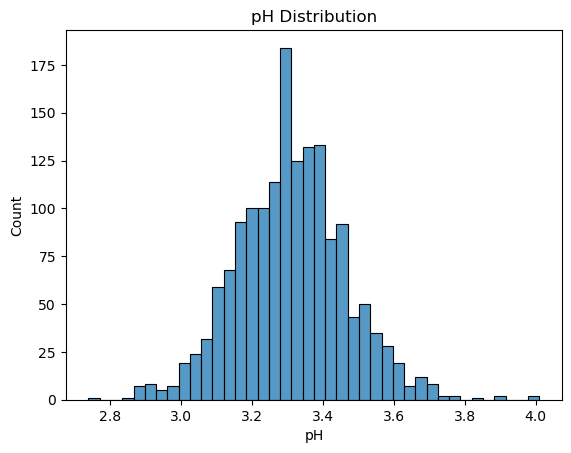

In [11]:
# pH Distribution

sns.histplot(rwine.pH)
plt.title("pH Distribution")
plt.show()

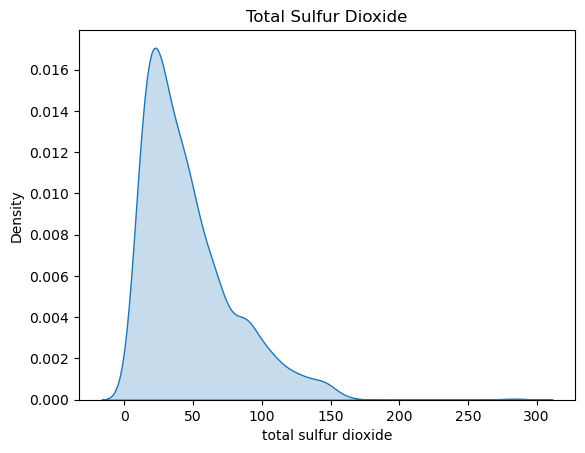

In [12]:
# Total Sulfur Dioxide Distribution

sns.kdeplot(rwine["total sulfur dioxide"], fill = True)
plt.title("Total Sulfur Dioxide")
plt.show()

In [13]:
# Check Missing Values

rwine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

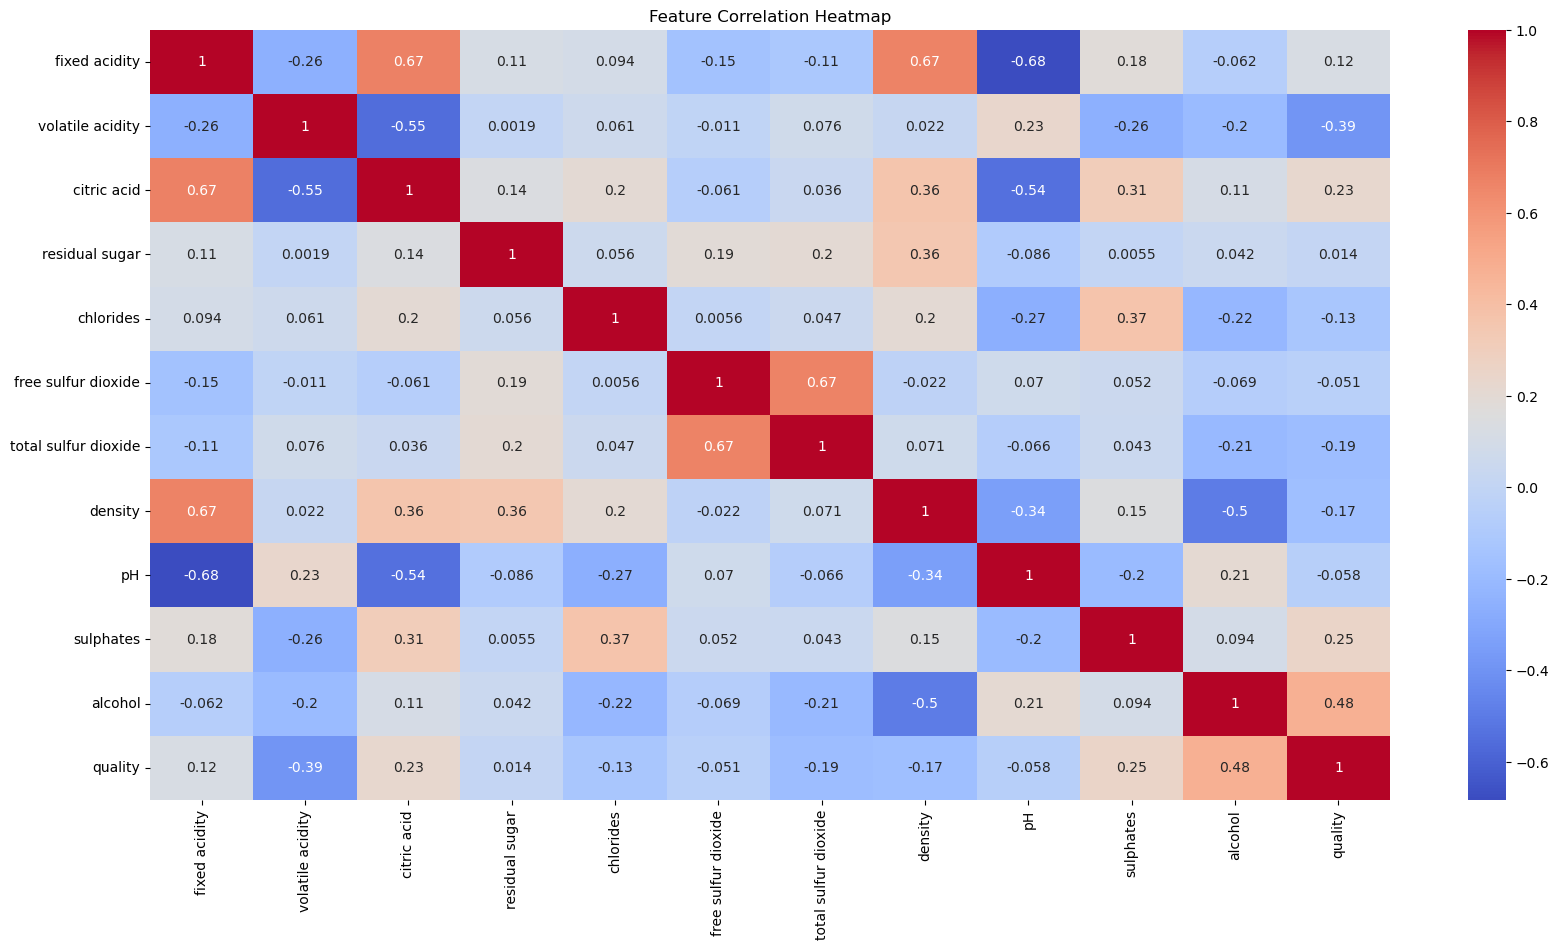

In [14]:
# Explore Feature Correlation

fig = plt.figure(figsize = [20,10])
sns.heatmap(rwine.corr(), cmap = "coolwarm", annot = True)
plt.title("Feature Correlation Heatmap")
plt.show()

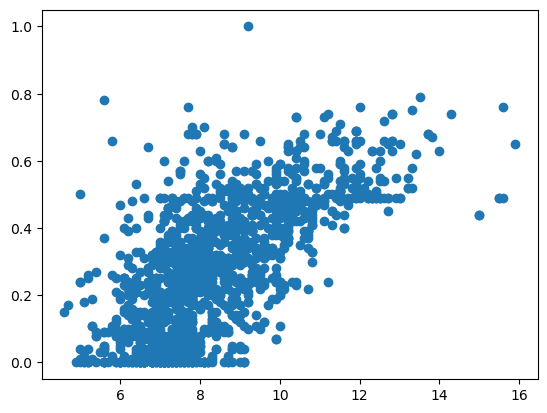

In [15]:
# Explore Correlation of Fixed Acidity and Citric Acid

plt.scatter(x="fixed acidity", y="citric acid", data=rwine)

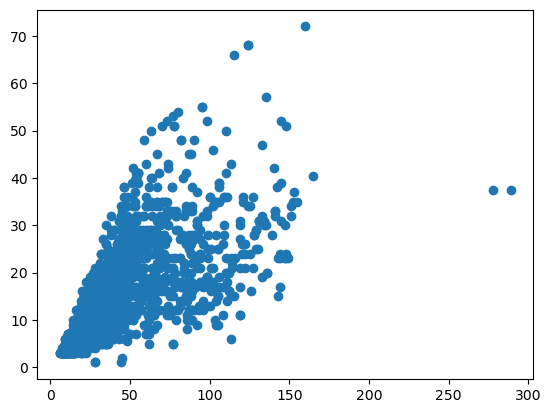

In [16]:
# Explore Correlation of Total Sulfur Dioxide and Free Sulfur Dioxide

plt.scatter(x="total sulfur dioxide", y="free sulfur dioxide", data=rwine)

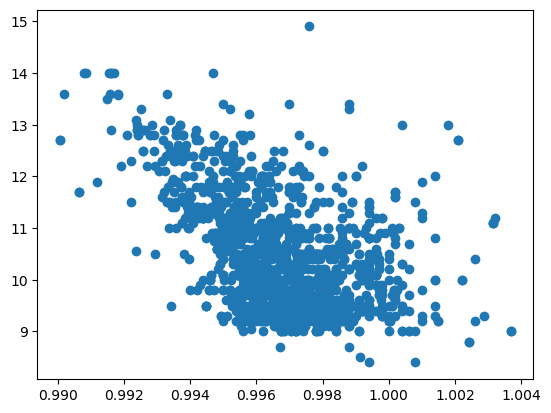

In [17]:
# Explore Correlation of Density and Alcohol


plt.scatter(x="density", y="alcohol", data=rwine)

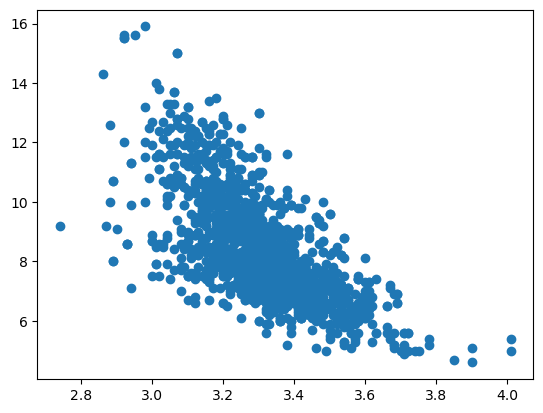

In [18]:
# Explore Correlation of pH and Fixed Acidity


plt.scatter(x="pH", y="fixed acidity", data=rwine)

In [19]:
# Check Imbalance of Output Feature (Wine Quality)

rwine.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

<Axes: xlabel='quality', ylabel='count'>

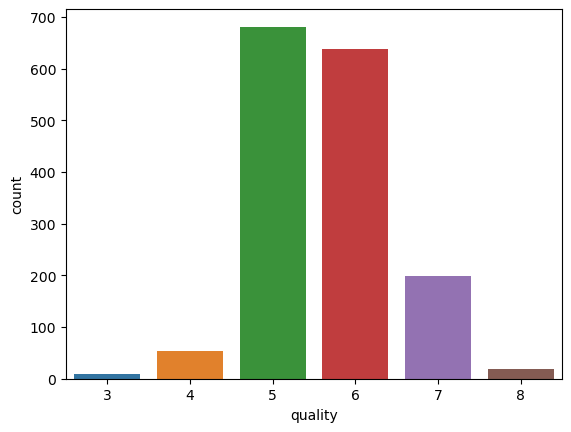

In [20]:
# Visualise Imbalance of Wine Quality


sns.countplot(rwine, x = "quality")

<Axes: >

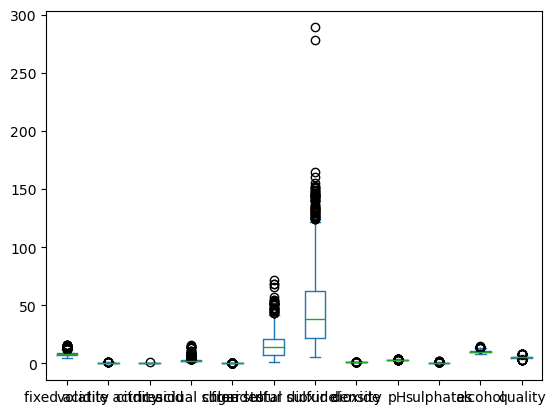

In [21]:
# Check Outliers in rwine

rwine.plot.box()

<Axes: >

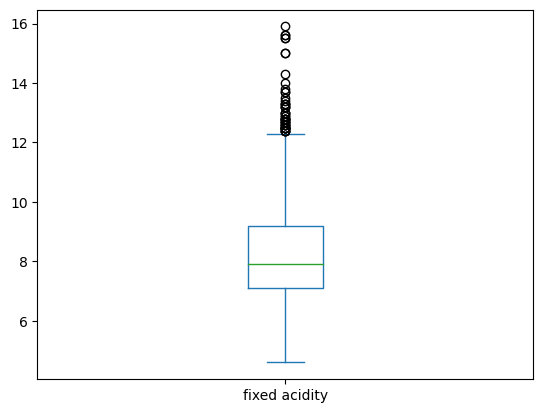

In [22]:
# Check Outliers in Fixed Acidity

rwine["fixed acidity"].plot.box()

<Axes: >

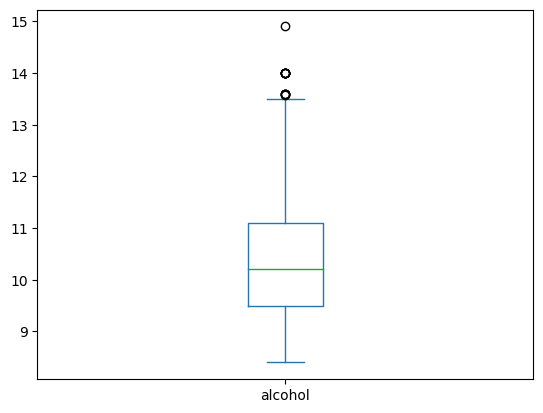

In [23]:
# Check Outliers in Alcohol

rwine["alcohol"].plot.box()

<Axes: >

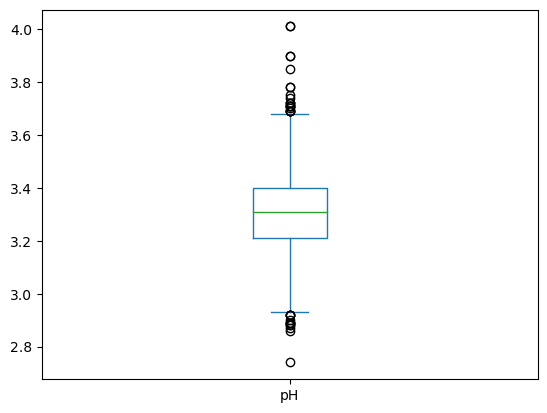

In [24]:
# Check Outliers in pH

rwine.pH.plot.box()

Shape of rwinef1 : (1451, 12)


5    617
6    586
7    185
4     47
8     16
Name: quality, dtype: int64

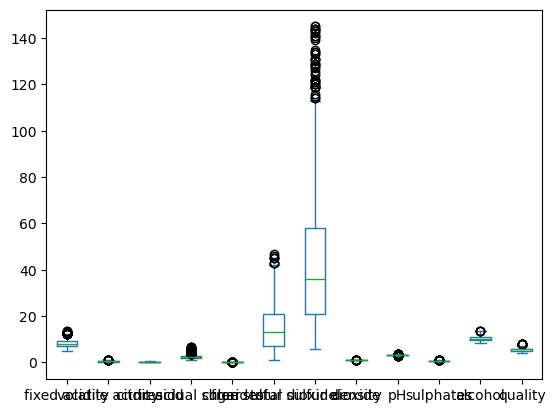

In [25]:
# Remove Outliers in Dataset Using Z-Score

zs = stats.zscore(rwine)
threshold = 3
rwinef1 = rwine[(np.abs(zs) < threshold).all(axis=1)]

rwinef1.plot.box()
print ("Shape of rwinef1 :", rwinef1.shape)
rwinef1.quality.value_counts()

Shape of rwinef2 : (1084, 12)


6    483
5    477
7    124
Name: quality, dtype: int64

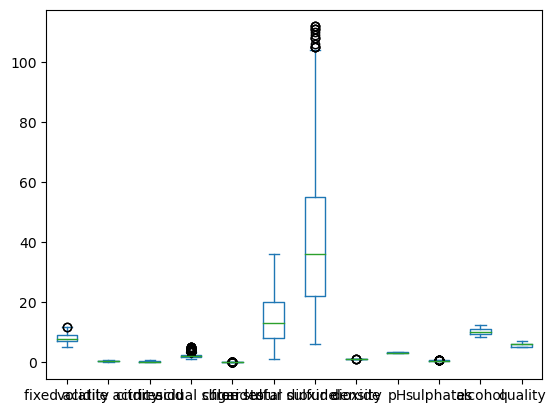

In [26]:
# Remove Outliers in Dataset Using Z-Score

zs = stats.zscore(rwine)
threshold = 2
rwinef2 = rwine[(np.abs(zs) < threshold).all(axis=1)]

rwinef2.plot.box()
print ("Shape of rwinef2 :", rwinef2.shape)
rwinef2.quality.value_counts()

# Define and Split Independent and Dependent Variables in rwine

In [27]:
# Define Independent and Dependent (Quality)

x = rwine.drop(["quality"], axis = 1)
y = rwine.quality

In [28]:
# Check Summary of Independent Variables (x)

x.info()

print("The shape of x :", x.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
dtypes: float64(11)
memory usage: 137.5 KB
The shape of x : (1599, 11)


In [29]:
# Check Summary of Dependent Variable (y)

y.info()

print("The shape of y :", y.shape)

<class 'pandas.core.series.Series'>
RangeIndex: 1599 entries, 0 to 1598
Series name: quality
Non-Null Count  Dtype
--------------  -----
1599 non-null   int64
dtypes: int64(1)
memory usage: 12.6 KB
The shape of y : (1599,)


In [30]:
# Split rwine into Train and Test Sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y)

In [31]:
# View Shape of Train and Test Sets

print("x train shape :", x_train.shape)
print("x test shape :", x_test.shape)
print("y train shape :", y_train.shape)
print("y test shape:", y_test.shape)

x train shape : (1279, 11)
x test shape : (320, 11)
y train shape : (1279,)
y test shape: (320,)


# Standardisation, Feature Selection and Balancing rwine

In [32]:
# Standardise Train and Test Sets using Standard Scaler

sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [33]:
# Feature Selection using Select From Model

sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
x_train_fs = sel.fit_transform(x_train_sc, y_train)
x_test_fs  = sel.transform(x_test_sc)

In [34]:
# View Selected Features (True) and Non-Selected Features (False)

sel.get_support()

array([False,  True, False, False, False, False,  True,  True, False,
        True,  True])

In [35]:
# View Number of Selected Features

x_train_fs = pd.DataFrame(x_train_sc, columns = x.columns)

x_test_fs = pd.DataFrame(x_test_sc, columns = x.columns)

selected_feat= x_train_fs.columns[(sel.get_support())]

len(selected_feat)

5

In [36]:
# View Selected Features

print(selected_feat)

Index(['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates',
       'alcohol'],
      dtype='object')


<Axes: xlabel='quality', ylabel='count'>

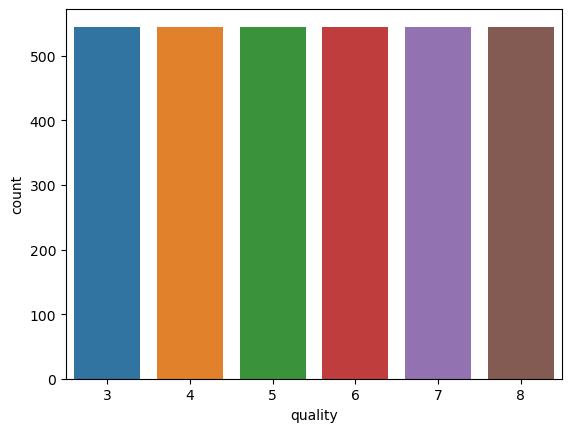

In [37]:
# Balance Feature Selected rwine using SMOTE ()

smote = SMOTE(random_state = 0)

x_train_smote, y_train_smote = smote.fit_resample(x_train_fs, y_train)

sns.countplot(x = y_train_smote)

# Predict Test Results Without Standardisation, Feature Selection and Balancing rwine

## Random Forest Classifier

In [38]:
# Fit Random Forest Classifier Model into Training Set

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [39]:
# Predict Test Set Results

y_pred = rfc.predict(x_test)

print(y_pred)

[6 6 5 7 6 6 5 6 6 5 6 6 6 5 5 5 5 5 6 5 6 5 6 5 6 6 5 5 5 6 6 6 5 6 6 6 6
 6 6 6 6 5 5 5 7 6 7 6 6 5 5 5 5 5 5 5 6 7 5 5 6 5 6 6 5 6 6 5 6 5 6 5 6 5
 7 5 5 7 5 6 6 5 5 5 6 6 6 5 5 5 7 6 7 6 5 6 5 6 6 6 5 7 7 7 5 7 5 6 5 7 6
 5 5 7 5 5 5 6 5 6 5 5 5 5 6 5 6 5 5 5 7 5 5 5 6 6 6 5 6 5 5 6 5 6 6 6 5 6
 5 6 6 5 7 5 6 5 6 5 5 7 6 5 6 6 5 5 6 5 5 5 6 5 5 5 6 5 5 5 6 5 5 6 6 5 6
 5 5 6 5 5 5 5 5 5 5 6 6 6 6 5 5 7 6 7 6 5 6 5 5 6 5 6 5 6 6 6 6 6 4 6 5 6
 6 5 6 5 6 6 6 5 5 6 6 7 6 5 6 5 5 7 6 7 5 5 5 6 7 6 6 6 6 5 5 5 5 6 5 5 5
 6 5 5 5 6 6 6 6 7 5 6 6 6 5 6 5 5 5 5 5 5 5 5 6 5 6 6 6 6 6 5 6 5 6 5 6 6
 6 7 7 6 6 7 5 5 6 6 5 6 5 6 6 7 6 5 6 5 6 5 6 5]


In [40]:
# Predict Test Set Results

print(y_test)

954     6
1483    5
174     5
1098    7
374     6
       ..
599     6
1261    4
629     5
319     6
803     6
Name: quality, Length: 320, dtype: int64


In [41]:
# Evaluate Model Performance

acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:%.2f\n\n"%(acc)) 
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm, "\n\n")

print("-------------------------------------------------------------")

result = metrics.classification_report(y_test, y_pred)
print("Classification Report:\n")
print(result)

Accuracy:0.71


Confusion Matrix
[[  0   1   1   0   0   0]
 [  0   0   5   6   0   0]
 [  0   0 115  20   1   0]
 [  0   0  27  94   7   0]
 [  0   0   2  20  18   0]
 [  0   0   0   1   2   0]] 


-------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.77      0.85      0.80       136
           6       0.67      0.73      0.70       128
           7       0.64      0.45      0.53        40
           8       0.00      0.00      0.00         3

    accuracy                           0.71       320
   macro avg       0.35      0.34      0.34       320
weighted avg       0.67      0.71      0.69       320



C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


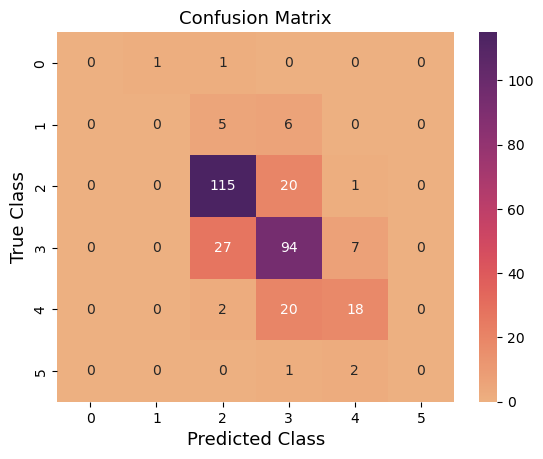

In [42]:
# Visualise Confusion Matrix

ax = sns.heatmap(cm, cmap = "flare", annot = True, fmt = "d")
plt.xlabel("Predicted Class", fontsize = 13)
plt.ylabel("True Class", fontsize = 13)
plt.title("Confusion Matrix", fontsize= 13)
plt.show()

## Decision Tree Classifier

In [43]:
# Fit Decision Tree Classifier Model into Training Set

dtc = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [44]:
# Predict Test Set Results

y_pred = dtc.predict(x_test)
print(y_pred)

[4 5 5 8 7 6 6 3 6 5 6 6 5 4 5 6 5 6 6 5 6 4 4 5 7 6 4 5 5 6 7 6 6 6 6 6 6
 5 6 6 6 5 5 5 7 6 7 6 6 5 5 5 4 6 5 5 6 7 6 5 6 5 6 7 5 6 6 5 6 5 4 6 6 5
 7 3 5 5 5 6 6 5 5 6 6 5 6 4 5 5 7 6 7 6 5 6 5 5 6 6 5 7 7 6 5 5 5 7 5 7 6
 5 5 7 5 7 5 7 5 6 5 5 5 5 5 5 6 5 5 4 6 5 5 5 6 6 6 4 5 5 6 6 5 5 5 7 5 6
 5 6 6 5 6 5 6 5 5 5 5 7 6 5 6 7 5 5 6 5 5 6 7 5 4 5 6 5 5 4 6 5 5 6 6 5 6
 6 4 5 5 6 5 5 5 5 5 6 5 6 6 5 5 7 6 7 8 6 6 5 5 6 5 6 5 6 7 6 6 6 5 5 4 6
 6 5 6 4 7 6 6 5 5 6 6 7 6 5 6 6 5 7 6 6 5 5 6 4 7 6 6 5 6 5 4 5 5 6 3 5 5
 6 5 5 5 5 7 6 6 8 5 6 6 7 5 5 6 5 6 6 5 5 6 3 6 5 5 6 8 6 6 5 6 5 7 5 6 7
 6 7 6 6 6 5 6 5 6 6 5 6 6 6 6 6 6 5 5 5 6 4 6 5]


In [45]:
# Predict Test Set Results

print(y_test)

954     6
1483    5
174     5
1098    7
374     6
       ..
599     6
1261    4
629     5
319     6
803     6
Name: quality, Length: 320, dtype: int64


In [46]:
# Evaluate Model Performance

acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:%.2f\n\n"%(acc)) 
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm, "\n\n")

print("-------------------------------------------------------------")

result = metrics.classification_report(y_test, y_pred)
print("Classification Report:\n")
print(result)

Accuracy:0.62


Confusion Matrix
[[ 0  0  2  0  0  0]
 [ 2  1  4  3  1  0]
 [ 2  9 95 27  3  0]
 [ 0  6 28 85  8  1]
 [ 0  2  3 13 19  3]
 [ 0  0  1  0  2  0]] 


-------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.06      0.09      0.07        11
           5       0.71      0.70      0.71       136
           6       0.66      0.66      0.66       128
           7       0.58      0.47      0.52        40
           8       0.00      0.00      0.00         3

    accuracy                           0.62       320
   macro avg       0.33      0.32      0.33       320
weighted avg       0.64      0.62      0.63       320



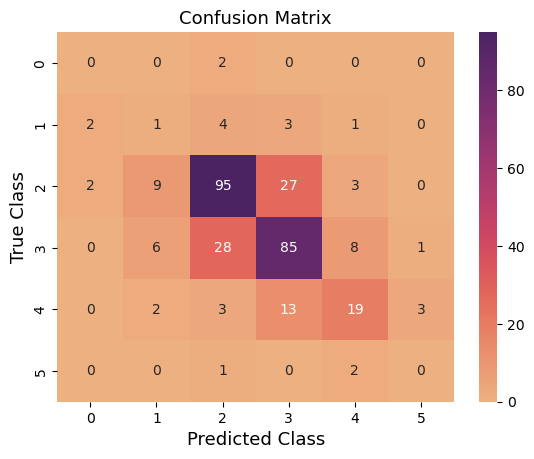

In [47]:
# Visualise Confusion Matrix

ax = sns.heatmap(cm, cmap = "flare", annot = True, fmt = "d")
plt.xlabel("Predicted Class", fontsize = 13)
plt.ylabel("True Class", fontsize = 13)
plt.title("Confusion Matrix", fontsize= 13)
plt.show()

# Predict Test Results using only Standardised rwine

## Random Forest Classifier

In [48]:
# Fit Random Forest Classifier Model into Training Set

rfc = RandomForestClassifier()
rfc.fit(x_train_sc, y_train)

RandomForestClassifier()

In [49]:
# Predict Test Set Results

y_pred = rfc.predict(x_test_sc)
print(y_pred)

[6 7 5 7 7 6 5 6 6 5 7 6 6 5 5 5 5 5 6 5 6 5 6 5 6 6 5 5 5 6 6 6 5 6 6 6 6
 6 6 6 6 5 5 5 7 6 7 6 6 5 5 5 5 5 5 5 6 7 5 5 6 5 6 7 5 6 6 5 6 5 6 5 6 5
 7 5 5 6 5 6 6 5 5 5 6 6 6 5 5 5 7 6 7 6 5 6 5 6 6 6 5 7 7 7 5 6 5 6 5 7 6
 5 5 7 5 5 5 6 5 6 5 5 5 5 6 5 6 5 5 5 7 5 5 5 6 6 6 5 6 5 5 6 5 6 6 6 5 6
 5 6 6 5 6 5 6 5 6 5 5 7 6 5 6 6 5 5 6 5 5 7 7 5 5 5 6 5 5 5 6 5 5 6 6 5 6
 5 5 6 5 5 5 5 5 5 5 6 6 6 6 5 5 7 6 7 5 5 6 5 5 6 5 6 5 6 6 6 6 6 5 6 6 6
 6 5 6 6 6 6 6 5 5 6 6 7 6 5 6 5 5 7 6 7 5 5 5 6 7 7 6 6 6 5 6 5 5 6 5 5 5
 6 5 5 5 6 7 6 6 7 5 6 6 6 5 6 5 5 5 5 5 5 5 5 6 5 6 6 6 6 6 5 6 5 6 5 6 6
 6 7 7 6 6 7 5 5 6 6 5 6 5 4 6 6 6 5 6 5 6 5 6 5]


In [50]:
# Predict Test Set Results

print(y_test)

954     6
1483    5
174     5
1098    7
374     6
       ..
599     6
1261    4
629     5
319     6
803     6
Name: quality, Length: 320, dtype: int64


In [51]:
# Evaluate Model Performance

acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:%.2f\n\n"%(acc)) 
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm, "\n\n")

print("-------------------------------------------------------------")

result = metrics.classification_report(y_test, y_pred)
print("Classification Report:\n")
print(result)

Accuracy:0.70


Confusion Matrix
[[  0   0   2   0   0   0]
 [  0   0   5   6   0   0]
 [  0   0 113  19   4   0]
 [  0   1  28  91   8   0]
 [  0   0   0  21  19   0]
 [  0   0   0   2   1   0]] 


-------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.76      0.83      0.80       136
           6       0.65      0.71      0.68       128
           7       0.59      0.47      0.53        40
           8       0.00      0.00      0.00         3

    accuracy                           0.70       320
   macro avg       0.34      0.34      0.33       320
weighted avg       0.66      0.70      0.68       320



C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


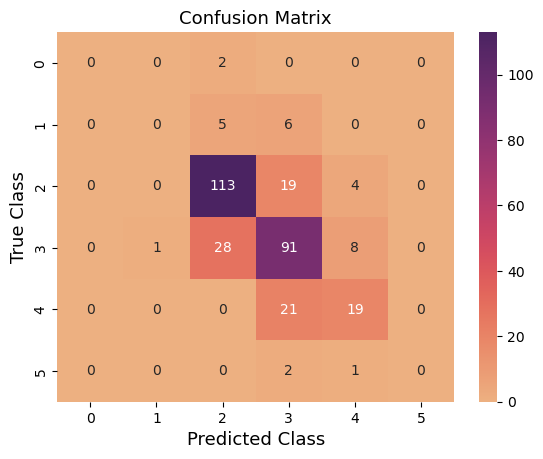

In [52]:
# Visualise Confusion Matrix

ax = sns.heatmap(cm, cmap = "flare", annot = True, fmt = "d")
plt.xlabel("Predicted Class", fontsize = 13)
plt.ylabel("True Class", fontsize = 13)
plt.title("Confusion Matrix", fontsize= 13)
plt.show()

## Decision Tree Classifier

In [53]:
# Fit Decision Tree Classifier Model into Training Set

dtc = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
dtc.fit(x_train_sc, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [54]:
# Predict Test Set Results

y_pred = dtc.predict(x_test_sc)

print(y_pred)

[5 5 5 8 7 6 6 3 6 5 6 6 5 4 5 6 5 6 6 5 6 4 4 5 7 6 4 5 5 6 7 6 6 6 6 6 6
 5 6 6 6 5 5 5 7 6 7 6 6 5 5 5 4 6 5 5 6 7 6 5 6 5 6 7 5 6 6 5 6 5 4 6 6 5
 7 3 5 5 5 6 6 5 5 6 6 5 6 4 5 5 7 6 7 6 5 6 5 5 6 6 5 7 7 6 5 5 5 7 5 7 6
 5 5 7 5 7 5 7 5 6 5 5 5 5 5 5 6 5 5 4 6 5 5 5 6 6 6 4 5 5 6 6 5 5 5 7 5 6
 5 6 6 6 6 5 6 5 5 5 5 7 6 5 6 7 5 5 6 5 5 6 7 5 4 5 6 5 5 4 6 5 5 6 6 5 6
 6 4 5 5 6 5 5 5 5 5 6 5 6 6 5 5 7 6 7 8 6 6 5 5 6 5 6 5 6 7 6 6 6 5 5 4 6
 6 5 6 5 7 6 6 5 5 6 6 7 6 5 6 6 5 7 6 6 5 5 6 4 7 6 6 5 6 5 4 5 5 6 6 5 5
 6 5 5 5 5 7 6 6 8 5 6 6 7 5 5 6 5 6 6 5 5 6 3 6 5 5 6 8 6 6 5 6 5 7 5 6 7
 6 7 6 6 6 5 6 5 6 6 5 6 6 6 6 6 6 5 5 5 6 4 6 5]


In [55]:
# Predict Test Set Results

print(y_test)

954     6
1483    5
174     5
1098    7
374     6
       ..
599     6
1261    4
629     5
319     6
803     6
Name: quality, Length: 320, dtype: int64


In [56]:
# Evaluate Model Performance

acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:%.2f\n\n"%(acc)) 
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm, "\n\n")

print("-------------------------------------------------------------")

result = metrics.classification_report(y_test, y_pred)
print("Classification Report:\n")
print(result)

Accuracy:0.62


Confusion Matrix
[[ 0  0  2  0  0  0]
 [ 1  1  4  4  1  0]
 [ 2  8 95 28  3  0]
 [ 0  5 29 85  8  1]
 [ 0  2  3 13 19  3]
 [ 0  0  1  0  2  0]] 


-------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.06      0.09      0.07        11
           5       0.71      0.70      0.70       136
           6       0.65      0.66      0.66       128
           7       0.58      0.47      0.52        40
           8       0.00      0.00      0.00         3

    accuracy                           0.62       320
   macro avg       0.33      0.32      0.33       320
weighted avg       0.64      0.62      0.63       320



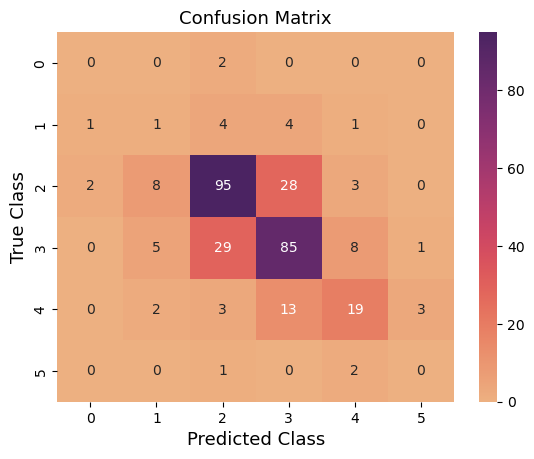

In [57]:
# Visualise Confusion Matrix

ax = sns.heatmap(cm, cmap = "flare", annot = True, fmt = "d")
plt.xlabel("Predicted Class", fontsize = 13)
plt.ylabel("True Class", fontsize = 13)
plt.title("Confusion Matrix", fontsize= 13)
plt.show()

# Predict Test Results using Standardised, Feature-Selected rwine

## Random Forest Classifier

In [58]:
# Fit Random Forest Classifier Model into Training Set

rfc = RandomForestClassifier()
rfc.fit(x_train_fs, y_train)

RandomForestClassifier()

In [59]:
# Predict Test Set Results

y_pred = rfc.predict(x_test_fs)

print(y_pred)

[6 7 5 7 7 6 5 6 5 5 7 6 6 5 5 6 5 5 6 5 6 5 6 5 6 6 5 5 5 6 6 6 5 6 6 5 6
 6 6 6 6 5 5 5 7 6 7 6 6 5 5 5 5 5 5 5 6 7 5 5 6 5 6 7 5 6 6 5 6 5 6 5 6 5
 7 6 5 6 5 6 6 5 5 5 6 6 6 5 5 5 7 6 7 6 5 6 5 6 6 6 5 7 7 7 5 6 5 6 5 7 6
 5 5 7 5 6 5 6 5 6 5 6 5 5 6 5 6 5 5 5 7 5 5 5 6 6 6 5 6 5 6 6 5 6 6 6 5 6
 5 6 6 5 7 5 6 5 6 5 5 7 6 5 6 6 5 5 6 5 5 6 6 5 5 5 6 5 5 5 6 5 6 6 6 5 6
 5 5 6 5 5 5 6 5 5 5 6 6 6 6 5 5 7 6 6 5 5 6 5 5 6 5 6 5 6 6 6 6 6 5 6 6 6
 6 5 6 5 6 6 6 5 5 6 6 7 6 5 6 5 5 7 6 7 5 6 5 6 7 7 6 6 6 5 6 5 5 6 5 5 5
 6 5 5 5 6 6 6 6 7 5 6 6 6 5 6 5 5 5 5 5 5 6 5 6 5 6 6 6 6 6 5 6 5 6 5 6 6
 6 7 6 6 6 6 5 5 6 6 5 6 5 6 6 6 6 5 6 5 6 5 6 5]


In [60]:
# Predict Test Set Results

print(y_test)

954     6
1483    5
174     5
1098    7
374     6
       ..
599     6
1261    4
629     5
319     6
803     6
Name: quality, Length: 320, dtype: int64


In [61]:
# Evaluate Model Performance

acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:%.2f\n\n"%(acc)) 
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm, "\n\n")

print("-------------------------------------------------------------")

result = metrics.classification_report(y_test, y_pred)
print("Classification Report:\n")
print(result)

Accuracy:0.71


Confusion Matrix
[[  0   0   2   0   0   0]
 [  0   0   3   8   0   0]
 [  0   0 111  22   3   0]
 [  0   0  26  98   4   0]
 [  0   0   0  21  19   0]
 [  0   0   0   2   1   0]] 


-------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.78      0.82      0.80       136
           6       0.65      0.77      0.70       128
           7       0.70      0.47      0.57        40
           8       0.00      0.00      0.00         3

    accuracy                           0.71       320
   macro avg       0.36      0.34      0.34       320
weighted avg       0.68      0.71      0.69       320



C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


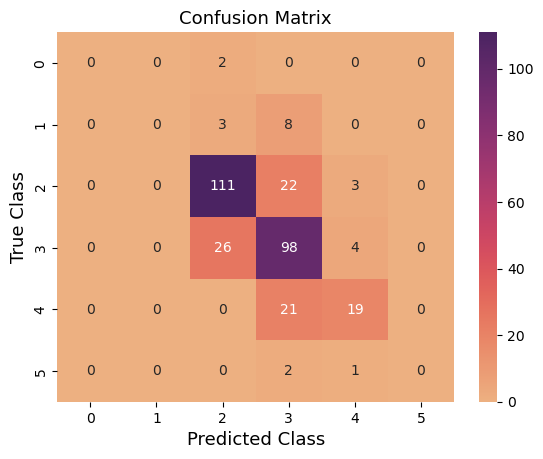

In [62]:
# Visualise Confusion Matrix

ax = sns.heatmap(cm, cmap = "flare", annot = True, fmt = "d")
plt.xlabel("Predicted Class", fontsize = 13)
plt.ylabel("True Class", fontsize = 13)
plt.title("Confusion Matrix", fontsize= 13)
plt.show()

## Decision Tree Classifier

In [63]:
# Fit Decision Tree Classifier Model into Training Set

dtc = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
dtc.fit(x_train_fs, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [64]:
# Predict Test Set Results

y_pred = dtc.predict(x_test_fs)

print(y_pred)

[5 5 5 8 7 6 6 3 6 5 6 6 5 4 5 6 5 6 6 5 6 4 4 5 7 6 4 5 5 6 7 6 6 6 6 6 6
 5 6 6 6 5 5 5 7 6 7 6 6 5 5 5 4 6 5 5 6 7 6 5 6 5 6 7 5 6 6 5 6 5 4 6 6 5
 7 3 5 5 5 6 6 5 5 6 6 5 6 4 5 5 7 6 7 6 5 6 5 5 6 6 5 7 7 6 5 5 5 7 5 7 6
 5 5 7 5 7 5 7 5 6 5 5 5 5 5 5 6 5 5 4 6 5 5 5 6 6 6 4 5 5 6 6 5 5 5 7 5 6
 5 6 6 6 6 5 6 5 5 5 5 7 6 5 6 7 5 5 6 5 5 6 7 5 4 5 6 5 5 4 6 5 5 6 6 5 6
 6 4 5 5 6 5 5 5 5 5 6 5 6 6 5 5 7 6 7 8 6 6 5 5 6 5 6 5 6 7 6 6 6 5 5 4 6
 6 5 6 5 7 6 6 5 5 6 6 7 6 5 6 6 5 7 6 6 5 5 6 4 7 6 6 5 6 5 4 5 5 6 6 5 5
 6 5 5 5 5 7 6 6 8 5 6 6 7 5 5 6 5 6 6 5 5 6 3 6 5 5 6 8 6 6 5 6 5 7 5 6 7
 6 7 6 6 6 5 6 5 6 6 5 6 6 6 6 6 6 5 5 5 6 4 6 5]


In [65]:
# Predict Test Set Results

print(y_test)

954     6
1483    5
174     5
1098    7
374     6
       ..
599     6
1261    4
629     5
319     6
803     6
Name: quality, Length: 320, dtype: int64


In [66]:
# Evaluate Model Performance

acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:%.2f\n\n"%(acc)) 
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm, "\n\n")

print("-------------------------------------------------------------")

result = metrics.classification_report(y_test, y_pred)
print("Classification Report:\n")
print(result)

Accuracy:0.62


Confusion Matrix
[[ 0  0  2  0  0  0]
 [ 1  1  4  4  1  0]
 [ 2  8 95 28  3  0]
 [ 0  5 29 85  8  1]
 [ 0  2  3 13 19  3]
 [ 0  0  1  0  2  0]] 


-------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.06      0.09      0.07        11
           5       0.71      0.70      0.70       136
           6       0.65      0.66      0.66       128
           7       0.58      0.47      0.52        40
           8       0.00      0.00      0.00         3

    accuracy                           0.62       320
   macro avg       0.33      0.32      0.33       320
weighted avg       0.64      0.62      0.63       320



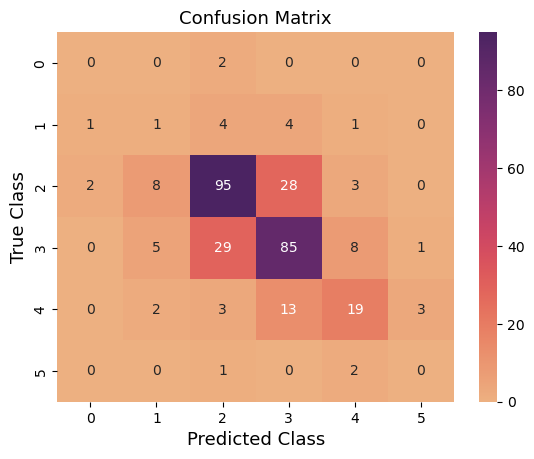

In [67]:
# Visualise Confusion Matrix

ax = sns.heatmap(cm, cmap = "flare", annot = True, fmt = "d")
plt.xlabel("Predicted Class", fontsize = 13)
plt.ylabel("True Class", fontsize = 13)
plt.title("Confusion Matrix", fontsize= 13)
plt.show()

# Predict Test Results using Standardised, Feature-Selected and Balanced rwine

## Random Forest Classifier

In [68]:
# Fit Random Forest Classifier Model into Training Set

rfc = RandomForestClassifier()
rfc.fit(x_train_smote, y_train_smote)

RandomForestClassifier()

In [69]:
# Predict Test Set Results

y_pred = rfc.predict(x_test_fs)

print(y_pred)

[6 6 5 6 7 8 5 4 6 5 7 6 6 5 5 5 5 5 6 5 6 4 4 5 8 6 5 5 5 6 7 6 5 6 5 6 6
 7 7 7 6 5 5 5 7 6 7 6 7 5 5 5 4 5 5 5 6 7 5 5 6 5 6 6 5 7 6 5 6 5 4 5 6 5
 7 5 5 6 5 6 6 3 5 5 6 6 6 6 5 5 7 7 7 6 5 6 5 6 6 6 5 7 7 7 5 6 5 6 5 7 6
 5 5 8 5 6 5 6 5 6 5 6 5 5 6 5 6 5 5 5 7 5 3 5 6 6 6 5 6 5 5 6 5 6 7 6 5 6
 5 6 6 5 7 5 6 5 6 5 5 7 6 5 6 6 5 6 7 5 5 6 7 5 4 4 6 5 5 6 5 5 6 6 4 5 6
 5 4 6 5 5 5 5 5 5 5 6 7 6 6 5 5 7 6 7 6 5 6 5 5 6 5 6 5 6 7 7 6 6 5 7 4 6
 6 5 6 6 6 6 6 5 5 6 6 7 6 5 7 5 5 7 6 7 5 5 5 6 8 7 6 3 6 5 4 5 5 7 6 5 5
 6 5 5 5 6 7 6 6 7 5 6 7 6 5 6 5 5 5 5 6 5 6 4 6 5 6 6 8 7 6 5 6 5 7 5 6 7
 4 7 6 6 5 8 5 5 6 8 5 6 5 6 6 7 6 5 7 6 6 5 6 5]


In [70]:
# Predict Test Set Results

print(y_test)

954     6
1483    5
174     5
1098    7
374     6
       ..
599     6
1261    4
629     5
319     6
803     6
Name: quality, Length: 320, dtype: int64


In [71]:
# Evaluate Model Performance

acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:%.2f\n\n"%(acc)) 
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm, "\n\n")

print("-------------------------------------------------------------")

result = metrics.classification_report(y_test, y_pred)
print("Classification Report:\n")
print(result)

Accuracy:0.67


Confusion Matrix
[[  0   0   2   0   0   0]
 [  0   3   2   6   0   0]
 [  2   6 107  17   4   0]
 [  1   1  20  83  20   3]
 [  0   3   1  12  21   3]
 [  0   0   0   1   1   1]] 


-------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.23      0.27      0.25        11
           5       0.81      0.79      0.80       136
           6       0.70      0.65      0.67       128
           7       0.46      0.53      0.49        40
           8       0.14      0.33      0.20         3

    accuracy                           0.67       320
   macro avg       0.39      0.43      0.40       320
weighted avg       0.69      0.67      0.68       320



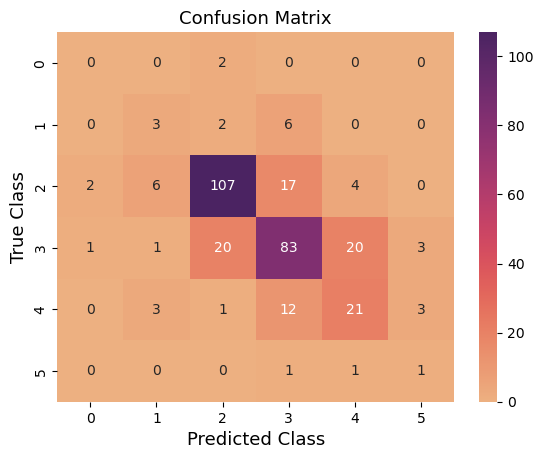

In [72]:
# Visualise Confusion Matrix

ax = sns.heatmap(cm, cmap = "flare", annot = True, fmt = "d")
plt.xlabel("Predicted Class", fontsize = 13)
plt.ylabel("True Class", fontsize = 13)
plt.title("Confusion Matrix", fontsize= 13)
plt.show()

## Decision Tree Classifier

In [73]:
# Fit Decision Tree Classifier Model into Training Set

dtc = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
dtc.fit(x_train_smote, y_train_smote)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [74]:
# Predict Test Set Results

y_pred = dtc.predict(x_test_fs)

print(y_pred)

[6 5 5 6 6 8 6 3 5 5 7 6 6 6 5 6 5 6 7 5 7 4 4 5 8 4 5 5 4 4 7 5 5 6 5 7 6
 6 6 7 7 5 5 4 7 6 7 6 7 5 5 5 4 5 5 5 6 7 6 6 6 5 7 7 5 7 6 5 5 6 5 5 6 5
 7 5 5 6 5 6 6 6 6 4 6 6 6 5 5 5 7 4 7 5 5 6 5 6 6 6 5 7 7 5 5 7 5 6 4 7 6
 5 5 8 5 5 6 7 5 6 5 6 5 5 7 5 6 5 5 4 7 5 4 5 6 6 6 5 5 5 4 6 5 4 7 8 5 6
 5 6 6 6 7 5 7 6 7 5 5 7 6 5 6 6 6 5 6 5 5 5 7 5 5 4 6 5 5 5 5 5 5 6 6 5 6
 6 5 7 5 5 5 6 5 5 5 6 7 6 7 5 5 7 6 7 7 4 8 4 5 6 5 7 5 6 7 6 6 6 4 7 5 6
 6 5 6 4 6 6 6 5 5 6 6 7 6 5 8 6 5 7 6 6 5 5 5 3 8 6 7 6 6 6 5 6 5 6 6 5 5
 6 5 5 5 6 6 6 6 7 5 6 5 6 5 5 5 5 4 6 6 5 6 5 6 5 5 6 5 5 6 5 6 5 6 7 7 8
 3 7 6 6 7 7 6 5 6 8 5 6 5 6 6 4 6 5 7 6 3 5 6 5]


In [75]:
# Predict Test Set Results

print(y_test)

954     6
1483    5
174     5
1098    7
374     6
       ..
599     6
1261    4
629     5
319     6
803     6
Name: quality, Length: 320, dtype: int64


In [76]:
# Evaluate Model Performance

acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:%.2f\n\n"%(acc)) 
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm, "\n\n")

print("-------------------------------------------------------------")

result = metrics.classification_report(y_test, y_pred)
print("Classification Report:\n")
print(result)

Accuracy:0.60


Confusion Matrix
[[ 0  1  1  0  0  0]
 [ 4  2  2  3  0  0]
 [ 0 10 96 25  5  0]
 [ 0  8 22 72 22  4]
 [ 0  0  4 12 20  4]
 [ 0  0  0  0  2  1]] 


-------------------------------------------------------------
Classification Report:

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.10      0.18      0.12        11
           5       0.77      0.71      0.74       136
           6       0.64      0.56      0.60       128
           7       0.41      0.50      0.45        40
           8       0.11      0.33      0.17         3

    accuracy                           0.60       320
   macro avg       0.34      0.38      0.35       320
weighted avg       0.64      0.60      0.61       320



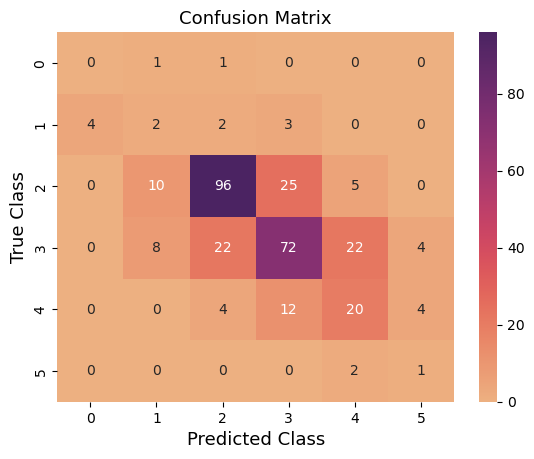

In [77]:
# Visualise Confusion Matrix

ax = sns.heatmap(cm, cmap = "flare", annot = True, fmt = "d")
plt.xlabel("Predicted Class", fontsize = 13)
plt.ylabel("True Class", fontsize = 13)
plt.title("Confusion Matrix", fontsize= 13)
plt.show()